In [20]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import copy
import string

from time import time

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


from sklearn.cluster import KMeans


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


from sklearn.metrics import pairwise_distances_argmin

sb.set(rc={'figure.figsize':(10,6)})
sb.set_style("whitegrid", {'axes.grid' : False})

Створення фрейму

In [2]:
def createdf(): #создача фрейма
    df = pd.read_csv("caffeine.csv")
    df.isnull().any()
    return(df)

In [3]:
df = createdf()
#removing missing values
df.dropna(inplace=True)

df.head()

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [4]:
label_encoder = LabelEncoder()
df2 = copy.deepcopy(df)
categories = ["type"]
for category in categories:
    print(df2[category].unique())
    df2[category]=label_encoder.fit_transform(df2[category])
    print(df2[category].unique())
    
print(df2.corr())

['Coffee' 'Energy Drinks' 'Energy Shots' 'Soft Drinks' 'Tea' 'Water']
[0 1 2 3 4 5]
               Volume (ml)  Calories  Caffeine (mg)      type
Volume (ml)       1.000000  0.341998       0.110770  0.005839
Calories          0.341998  1.000000      -0.126021 -0.075057
Caffeine (mg)     0.110770 -0.126021       1.000000 -0.361060
type              0.005839 -0.075057      -0.361060  1.000000


In [5]:
df3 = df2.drop('drink', axis=1)
'''names = df3.columns
df_n = preprocessing.normalize(df3, axis=0)
df_r = pd.DataFrame(df_n, columns=names)
x = df_r.drop('type', axis=1)'''
#Нормалізація
x = df3.drop('type', axis=1)
y = df2['type']
print(x.head())
plt_color = ['brown' if value == 0
        else 'b' if value == 5 
        else 'yellow'if value == 4
        else 'orange' if value == 3
        else 'lime' if value == 2
        else 'green' for value in y]
seaborn_color = ["brown", "green", "lime", "orange", "yellow", "blue"]

   Volume (ml)  Calories  Caffeine (mg)
0   256.993715         0            277
1   250.191810         0            145
2   250.191810       150            100
3   250.191810         0            430
4   250.191810         0             66


In [24]:
n_components = 2
columns = ["Component " + str(i+1) for i in range(n_components)]

alg = ["PCA","TSNE"]

start_time = time()
pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(x)
print("PCA : --- %s seconds ---" % (time() - start_time))
df_pca = pd.DataFrame(data = X_pca, columns = columns)

start_time = time()
tsne = TSNE(n_components = n_components)
X_tsne = tsne.fit_transform(x)
print("TSNE : --- %s seconds ---" % (time() - start_time))
df_tsne = pd.DataFrame(data = X_tsne, columns = columns)

PCA : --- 0.008008003234863281 seconds ---


C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


PCA : --- 3.2939839363098145 seconds ---


Гістограми

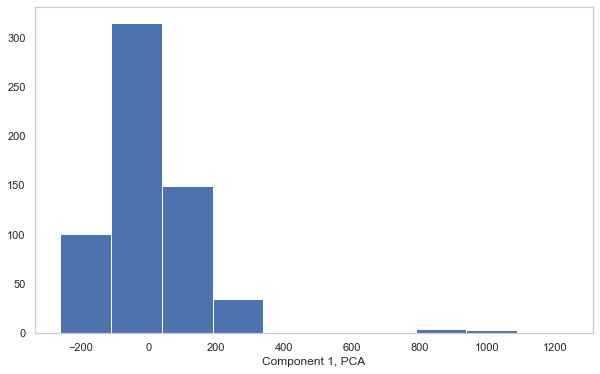

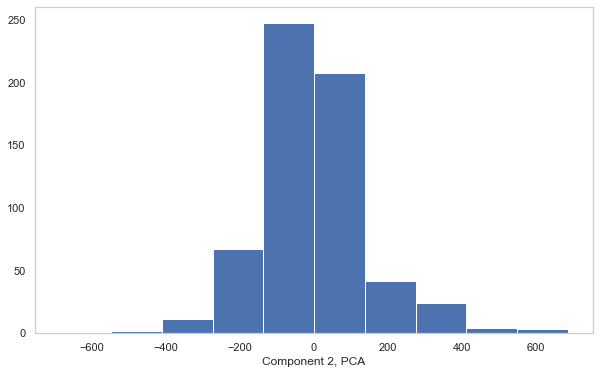

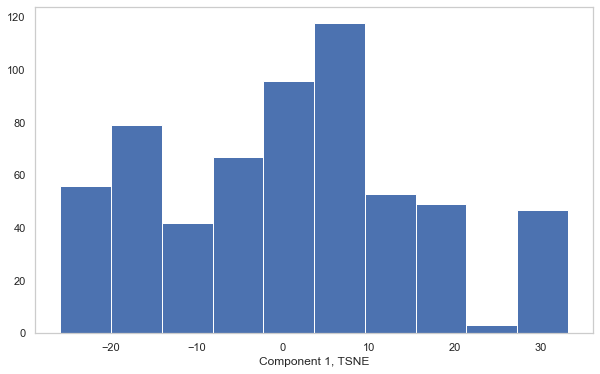

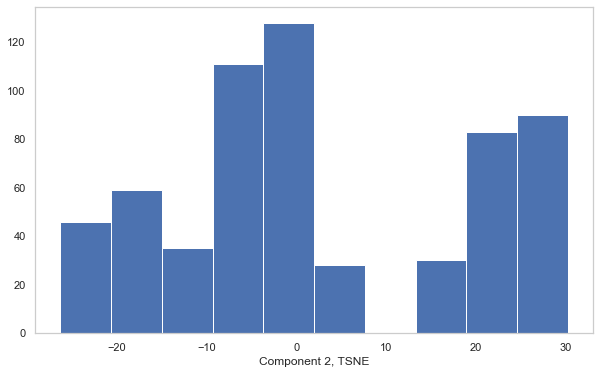

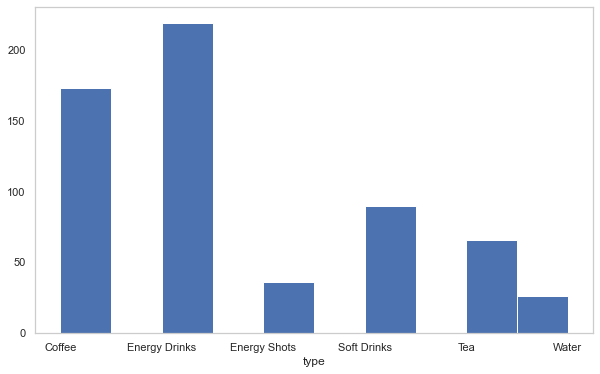

In [7]:
df_list = [df_pca, df_tsne]
for j in range (0,n_components):
    for i in range (0,n_components):
        plt.figure(figsize=(10,6))
        plt.hist(df_list[j][df_list[j].columns[i]])
        plt.xlabel(df_list[j].columns[i] + ", " + alg[j])
        plt.show()
plt.figure(figsize=(10,6))
plt.hist(df[df.columns[-1]])
plt.xlabel(df.columns[-1])
plt.show()

Heatmap

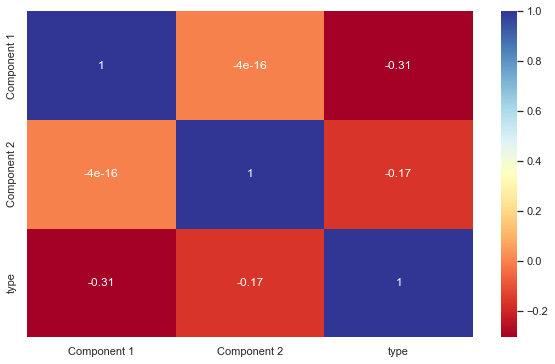

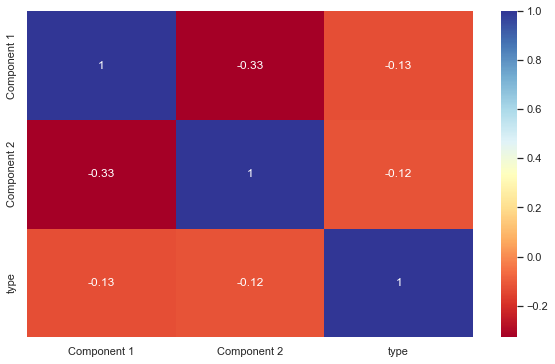

In [8]:
for i in range (0,n_components):
    df_temp = copy.deepcopy(df_list[i])
    df_temp['type'] = y
    dataplot = sb.heatmap(df_temp.corr(), cmap="RdYlBu", annot=True)
    plt.show()

Scatter plot

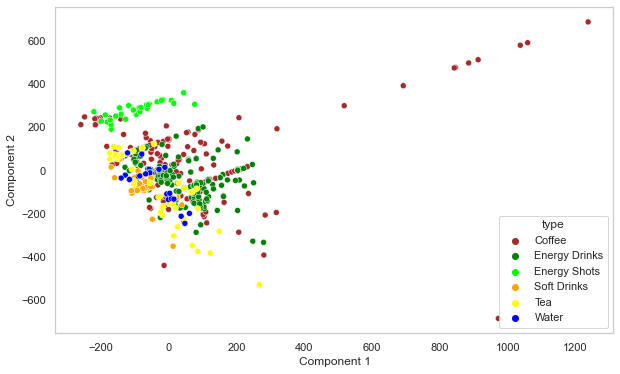

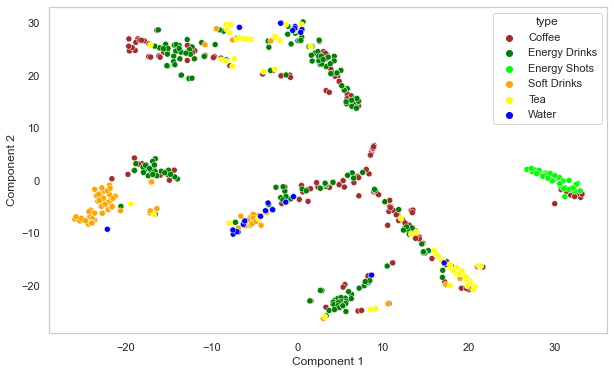

In [9]:
for i in range (0,n_components):
    dataplot = sb.scatterplot(
        x=df_list[i][columns[0]],
        y=df_list[i][columns[1]],
        hue=df['type'],
        palette=seaborn_color,
        legend="full"
    )
    plt.show()

K_means квантування зображення 

In [2]:
from skimage import io
from sklearn.utils import shuffle

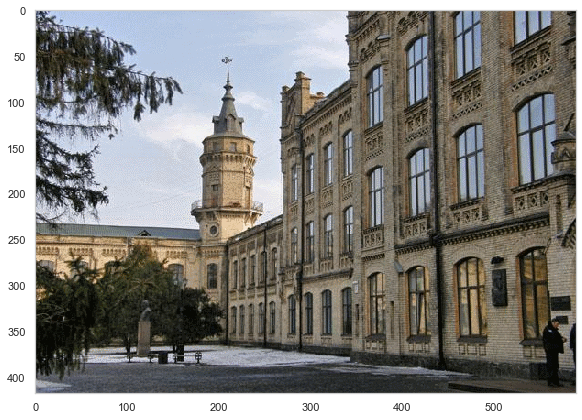

In [3]:
n_colors = [64, 32, 16, 8]
pic = io.imread("lab2pic.jpg")

io.imshow(pic)
#print(pic)
plt.show()

np_pic = np.array(pic, dtype=np.float64)/255
w, h, d = tuple(np_pic.shape)
assert d == 3
pic_array = np.reshape(np_pic, (w * h, d))
#print(pic_array)

N of colors: 64
Fitting model : --- 0.6568348407745361 seconds ---
Predicting : --- 0.186004638671875 seconds ---
Image: 


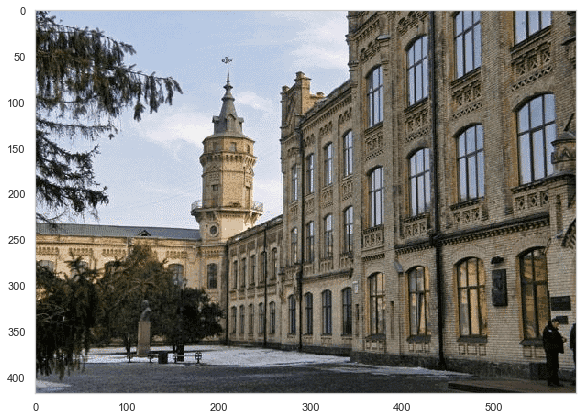

N of colors: 32
Fitting model : --- 0.16188907623291016 seconds ---
Predicting : --- 0.041023969650268555 seconds ---
Image: 


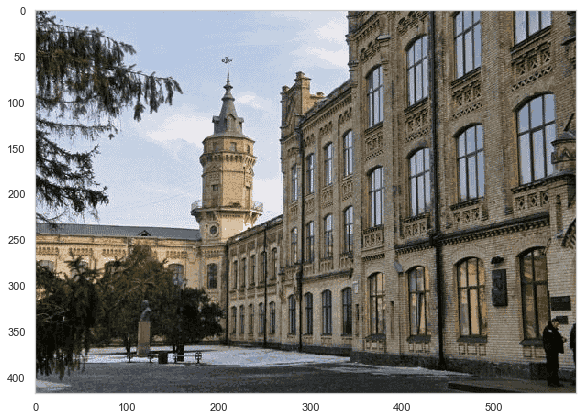

N of colors: 16
Fitting model : --- 0.1289372444152832 seconds ---
Predicting : --- 0.03902554512023926 seconds ---
Image: 


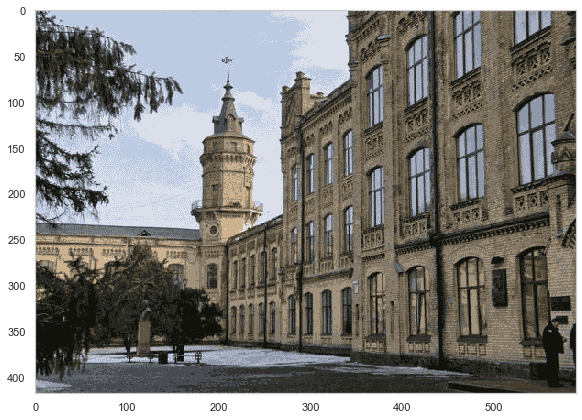

N of colors: 8
Fitting model : --- 0.08899450302124023 seconds ---
Predicting : --- 0.037018775939941406 seconds ---
Image: 


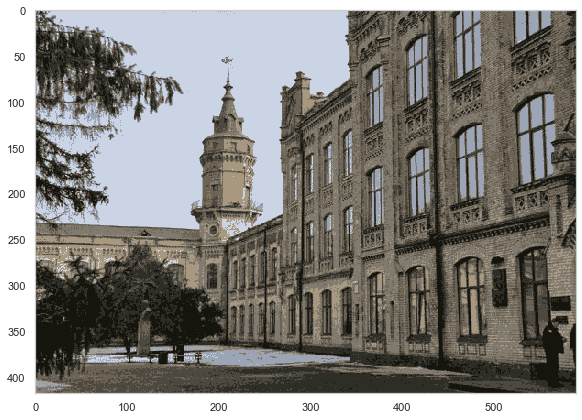

In [4]:
time_start = time()

for n in n_colors:
    print("N of colors: " + str(n))
    start_time = time()
    
    pic_train = shuffle(pic_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n, random_state=0).fit(pic_train)

    print("Fitting model : --- %s seconds ---" % (time() - start_time))

    
    start_time = time()
    
    prediction = kmeans.predict(pic_array)
    
    print("Predicting : --- %s seconds ---" % (time() - start_time))
    
    print("Image: ")
    io.imshow(kmeans.cluster_centers_[prediction].reshape(w, h, -1))
    plt.show()


Обробка тексту

In [23]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
import re

In [38]:
def remove_stopwords(text, stoplist):
    return [word for word in text if word not in stoplist]


def remove_punctuation(text):
    punctuation = string.punctuation
    return ''.join([c if c not in punctuation else ' ' for c in text])


def remove_spaces(text):
    return re.sub(r'\s+', ' ', text)

In [33]:
def lemmatize_text(data):
    min_length = 2
    stoplist = stopwords.words("russian")
    morph = pymorphy3.MorphAnalyzer(lang='ru')  # 'fix'
    lemmatized_text = []
    for text in data['text']:
        text_lem = [morph.parse(word)[0].normal_form for word in text.split(' ')]
        text_lem = remove_stopwords(text_lem, stoplist)

        if len(text_lem) > min_length:
            lemmatized_text.append(' '.join(text_lem))
        else:
            lemmatized_text.append('')
    data['text'] = lemmatized_text
    return data

In [55]:
filename = "lenta-ru-train.csv"
data = pd.read_csv(filename, index_col=False, encoding="utf8", nrows=10000)
df = pd.DataFrame(data)
df.head()

,title,text,topic,topic_label
0,"Инфляция в январе 2006 года составит 2,6 процента","Глава Росстата Владимир Соколин заявил, что в ...",Экономика,0
1,Никита Михалков учредил День российского кино,У российских кинематографистов появится новый...,Культура,3
2,Марко Матерацци вернется в строй к матчу с ЦСКА,"Медицинский штаб миланского ""Интера"" обнародов...",Спорт,1
3,"Определены лауреаты премии ""Книга года""","Премии ""Книга года"" в 13 номинациях вручены на...",Культура,3
4,Гол Роналду со штрафного спас португальцев от ...,Сборная Португалии сыграла вничью с командой И...,Спорт,1


In [58]:
df2 = copy.deepcopy(df[['topic','topic_label']])
print(df2.drop_duplicates())

              topic  topic_label
0         Экономика            0
1          Культура            3
2             Спорт            1
8   Наука и техника            2
38           Бизнес            4


In [26]:
df['text'] = df['title'].str.ljust(1) + df['text']
df = df.drop(['topic', 'title'], axis=1)

In [27]:
cleaned_text = [remove_punctuation(remove_spaces(str(text).lower())) for text in df['text']]
df['text'] = cleaned_text
df.head()

,text,topic_label
0,инфляция в январе 2006 года составит 2 6 проце...,0
1,никита михалков учредил день российского киноу...,3
2,марко матерацци вернется в строй к матчу с цск...,1
3,определены лауреаты премии книга года премии ...,3
4,гол роналду со штрафного спас португальцев от ...,1


In [35]:
#!pip install pymorphy3
import pymorphy3

In [36]:
df2 = lemmatize_text(df)

In [39]:
df.head()

,text,topic_label
0,инфляция январь 2006 год составить 2 6 процент...,0
1,никита михалков учредить день российский киноу...,3
2,марко матерацци вернуться строй матч цскамедиц...,1
3,определить лауреат премия книга год премия к...,3
4,гол роналда штрафной спасти португалец поражен...,1


In [29]:
#!pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator

In [40]:
text = copy.deepcopy(df2['text'])
text = text.tolist()
text = ' '.join(text)

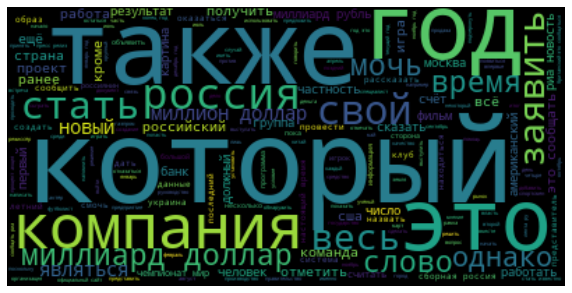

In [41]:
wordcloud = WordCloud(collocations=True).generate(text)


plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [42]:
del text

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df2['text'])

In [48]:
y = df2['topic_label']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5, random_state = 0)

In [50]:
acc = 0
tree1 = 0
for i in range (2, 50):
    forest = RandomForestClassifier (criterion='entropy', n_estimators = i)
    forest.fit(X_train, Y_train) 
    y_pred = forest.predict(X_test)
    #print ('Кількість дерев: ', i)
    accuracy = accuracy_score(Y_test, y_pred)
    #print("Точність: ", accuracy)
    if (accuracy>acc):
        acc = accuracy
        tree1 = i
        y_true_pred = copy.deepcopy(y_pred)
print("Найкраща точність: " + str(accuracy_score(Y_test, y_true_pred)) + " при " + str(tree1) + " дерев")
print(classification_report(Y_test, y_true_pred)) 
print("Матриця неточності:")
print(confusion_matrix(Y_test, y_true_pred)) 

Найкраща точність: 0.9138 при 45 дерев
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      1533
           1       0.98      0.98      0.98      1262
           2       0.95      0.85      0.90      1049
           3       0.95      0.93      0.94      1008
           4       0.00      0.00      0.00       148

    accuracy                           0.91      5000
   macro avg       0.74      0.75      0.74      5000
weighted avg       0.89      0.91      0.90      5000

Матриця неточності:
[[1501    5   15   12    0]
 [  12 1238    5    7    0]
 [ 125    7  890   27    0]
 [  44    8   16  940    0]
 [ 138    1    8    1    0]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


drink dataset: https://www.kaggle.com/heitornunes/caffeine-content-of-drinks

ru text dataset: https://www.kaggle.com/c/lenta-ru-ozon-2020